In [116]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn
from pprint import pp

# Package to implement Decision Tree Model
import sklearn
# models = [("xgboost", "XGBRegressor")]
# from sklearn.ensemble import VotingClassifier

from xgboost import XGBRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

need_mapie = True


In [117]:
df = pd.read_csv("Traffic_Volume.csv")


In [118]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   date_time       48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [119]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,10/2/12 9:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,10/2/12 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,10/2/12 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,10/2/12 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,10/2/12 13:00,4918


In [120]:
import datetime
import pytz
df['date_time'] = df['date_time'].map(
  lambda x: datetime.datetime.combine(
    date=datetime.date(month=int((x.split()[0]).split("/")[0]), 
                       day=int((x.split()[0]).split("/")[1]), 
                       year=int("20" + (x.split()[0]).split("/")[2])), 
    time=datetime.time(int(x.split()[1].split(":")[0]), int(x.split()[1].split(":")[0]), 0, 0), 
    tzinfo=pytz.timezone('US/Central')
  )
)
df['day_of_week'] = df['date_time'].map(
  lambda x: x.strftime("%A")
)
df['hour'] = df['date_time'].map(
  lambda x: int(x.strftime("%H"))
)
df['month'] = df['date_time'].map(
  lambda x: x.strftime("%B")
)
df.drop(columns=['date_time'], inplace=True)
X = df.drop(columns = ['traffic_volume'])
y = df['traffic_volume']
print(X.columns)
X_encoded = pd.get_dummies(X)
# X_encoded.head()
X_encoded.columns


Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'day_of_week', 'hour', 'month'],
      dtype='object')


Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour',
       'holiday_Christmas Day', 'holiday_Columbus Day',
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr Day', 'holiday_Memorial Day',
       'holiday_New Years Day', 'holiday_State Fair',
       'holiday_Thanksgiving Day', 'holiday_Veterans Day',
       'holiday_Washingtons Birthday', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog',
       'weather_main_Haze', 'weather_main_Mist', 'weather_main_Rain',
       'weather_main_Smoke', 'weather_main_Snow', 'weather_main_Squall',
       'weather_main_Thunderstorm', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
    

In [121]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state=565)

def get_models(model_list: list[tuple[str, str]] = None) -> list[tuple]:
  tuples = []
  if model_list != None:
    import sys
    for data in model_list:
      sub_module_str, model_str = data
      model = getattr(sys.modules[f"{sub_module_str}"], model_str)(random_state = 565)
      tuples.append((f"{model.__class__.__name__}", model))
  else:
    tuples = [("XGBRegressor", XGBRegressor(random_state=565))]
  return tuples

og_models = get_models()
print(og_models)


[('XGBRegressor', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=565, ...))]


In [122]:

for name, model in og_models:
  import time
  start = time.time()
  model.fit(train_X, train_y)
  stop = time.time()
  print(f"{name}: \n\r\tTraining time: {stop - start}s")

XGBRegressor: 
	Training time: 0.22461271286010742s


In [123]:
import sklearn.metrics


models_with_y_pred = []
f1_scores = []
for name, model in og_models:
  # Predict Test Set
  y_pred = model.predict(test_X)

  # Evaluate the model on test set
  # r2 = sklearn.metrics.r2_score(test_y, y_pred)
  # f1_score = sklearn.metrics.f1_score(test_y, y_pred, average='binary')
  # RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
  # print(f'{name}: \n\r\tR-squared on Test Set: {r2:0.2f}\n\r\tRoot-Mean-squared on Test Set: {RMSE_test:0.2f}\n\r\tF1 Score: {f1_score:f}')
  models_with_y_pred.append((name, {"y_pred": y_pred, "model": model}))
  # f1_scores.append(f1_score)
models = models_with_y_pred

# pp(models)

In [124]:
# Normalize the F1 scores
if hasattr(models[0][1], "f1_score"):
  weighted_f1_scores = (np.array(f1_scores) / np.linalg.norm(np.array(f1_scores))).tolist()
  for f1_score, data_with_name in zip(weighted_f1_scores, models):
    name, data = data_with_name
    data['f1_score'] = f1_score

# pp(models)

In [125]:
# # Add Soft Voting Classifier

# vot = VotingClassifier(og_models, voting='soft', weights=weighted_f1_scores)
# start = time.time()
# vot.fit(train_X, train_y)
# stop = time.time()
# print(f"VotingClassifier: \n\r\tTraining time: {stop - start}s")

In [126]:
# # Catch up the Soft Voting Classifier with the rest of the models
# name = vot.__class__.__name__
# y_pred = vot.predict(test_X)

# # Evaluate the model on test set
# r2 = sklearn.metrics.r2_score(test_y, y_pred)
# f1_score = sklearn.metrics.f1_score(test_y, y_pred, average='micro')
# RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
# models.append((name, {"y_pred": y_pred, "model": vot, 'f1_score': f1_score}))
# print(f'{name}: \n\r\tR-squared on Test Set: {r2:0.2f}\n\r\tRoot-Mean-squared on Test Set: {RMSE_test:0.2f}\n\r\tF1 Score: {f1_score:f}')

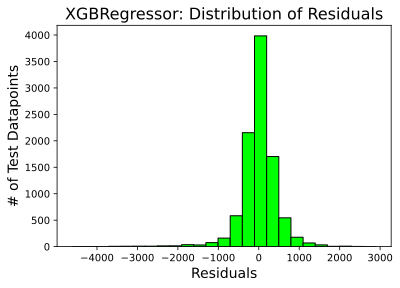

In [127]:
for name, data in models:
  # Calculate the residuals by subtracting the predicted values from the actual test values
  all_residuals = test_y - data["y_pred"]

  # Set up the figure with custom size and resolution (DPI)
  plt.figure(figsize=(6, 4), dpi = 150)

  # Plot the histogram of residuals
  plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

  # Label X and Y axes
  plt.xlabel('Residuals', fontsize = 14)
  plt.ylabel('# of Test Datapoints', fontsize = 14)

  # Set the title of the plot
  plt.title(f'{name}: Distribution of Residuals', fontsize = 16)

  # Adjust the font size of x and y ticks
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10);
  plt.savefig(f"{name}_residual_plot.svg")

In [128]:
# labels = ["Normal", "Suspect", "Pathological"]
for name, data in models:
  model_name = data['model'].__class__.__name__
  if model_name == "DecisionTreeClassifier":
    # Visualizing trained decision tree model
    fig = plt.figure(figsize = (25,20))
    a = tree.plot_tree(decision_tree = data['model'],
                      max_depth = None,
                      feature_names = train_X.columns,
                      class_names = labels,
                      filled = True)
    
    plt.title(f'{name}: Decision Tree Visualized', fontsize = 16)

    # Saving Decision Tree
    fig.savefig("DecisionTreeClassifier_visual.svg", bbox_inches = 'tight')
  else:
    print(f"{name}: Not Applicable")

XGBRegressor: Not Applicable


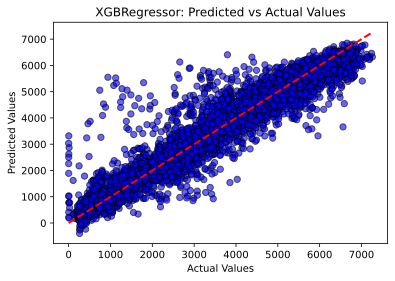

In [129]:
for name, data in models:  
  # Setting the figure size and resolution
  plt.figure(figsize = (6, 4), dpi = 150)

  # Scatter plot of actual vs predicted values
  plt.scatter(test_y, data['y_pred'], color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

  # 45-degree reference line (perfect predictions)
  plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

  # Axis labels and title
  plt.xlabel('Actual Values', fontsize = 10)
  plt.ylabel('Predicted Values', fontsize = 10)
  plt.title(f'{name}: Predicted vs Actual Values', fontsize = 12)

  # Adjust ticks
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10);
  plt.savefig(f'{name}_pred_vs_actual.svg')

In [130]:
for name, data in models:
  try:
    y_pred = data['y_pred']

    cm = confusion_matrix(test_y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix= cm)
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.set_title(f'{name}: Confusion Matrix', fontsize = 12)
    plt.rcParams.update({'font.size': 12})

    disp.plot(cmap = 'PuRd', ax = ax)
    disp.figure_.savefig(f"{name}_confusion_mat.svg")
  except:
    print(f"{name} cannot generate a confusion matrix")

XGBRegressor cannot generate a confusion matrix


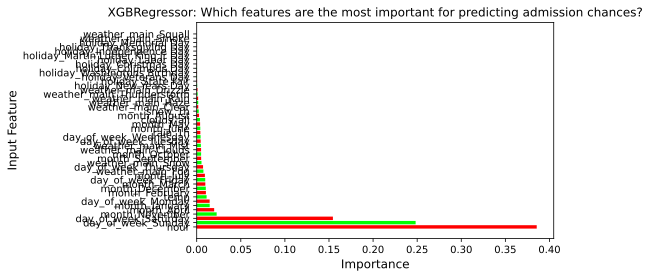

In [ ]:
for name, data in models:
  model = data['model']
  if not not hasattr(model, "feature_importances_"):
    # reg = data['model']
    # y_pred = data['y_pred']
    # Storing importance values from the trained model
    importance = data['model'].feature_importances_

    # Storing feature importance as a dataframe
    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                  columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


    # Bar plot
    plt.figure(figsize=(16, 8))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Input Feature", fontsize = 12)
    plt.title(f'{name}: Feature Importance', fontsize = 12) 
    plt.yticks(fontsize = 10) # fontsize of yticks
    plt.xticks(fontsize = 10) # fontsize of xticks

    plt.tight_layout();
    plt.savefig(f"{name}_feature_imp.svg")
  else:
    model = data['model']
    weights = model.get_params()['weights']
    columns = ['Feature']
    data = []
    for estimator in model.estimators_:
      columns.append(f"{estimator.__class__.__name__} Importance")
    for feature in train_X.columns.tolist():
      d = [feature]
      for _ in range(len(columns) - 1):
        d.append(0.0)
      data.append(d)
    feature_imp = pd.DataFrame(data, columns = columns)
    for estimator, weight in zip(model.estimators_, weights):
      for i, importance in enumerate(estimator.feature_importances_):
        weighted_importance = importance * weight
        feature_imp.loc[i, f"{estimator.__class__.__name__} Importance"] = weighted_importance
    feature_imp.drop(columns = ['Feature'], inplace = True)
    importance = feature_imp.sum(axis=1).tolist()

    feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
                  columns = ['Feature', 'Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)


    # Bar plot
    plt.figure(figsize=(8, 4))
    plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

    plt.xlabel("Importance", fontsize = 12)
    plt.ylabel("Input Feature", fontsize = 12)
    plt.title(f'{name}: Which features are the most important for predicting admission chances?', fontsize = 12) 
    plt.yticks(fontsize = 10) # fontsize of yticks
    plt.xticks(fontsize = 10) # fontsize of xticks

    plt.tight_layout();
    plt.savefig(f"{name}_feature_imp.svg")
      

In [132]:
for name, data in models:
  try:
    y_pred = data['y_pred']
    # Generating Classification Report
    report = classification_report(test_y, y_pred, output_dict = True)
    report_df = pd.DataFrame(report)
    print(f'\n\r{name}: Classification Report:\n\r')
    print(report_df)

    # Save the report as a CSV File
    report_df.to_csv(f'{name}_class_report.csv')
  except:
    print(f"{name} cannot produce a Classification report")

XGBRegressor cannot produce a Classification report


In [133]:
if need_mapie: 
  for name, data in models:
    from mapie.regression import MapieRegressor
    # Define MAPIE regressor
    reg = data['model']
    y_pred = data['y_pred']
    mapie = MapieRegressor(estimator = reg, # Prediction model to use
                          n_jobs = -1,
                          random_state = 565)

    # Fit mapie regressor on training data
    start = time.time()  
    mapie.fit(train_X, train_y)
    stop = time.time()             
    print(f"{reg.__class__.__name__}: \n\r\tTraining time: {stop - start}s")

    alpha = 0.1 # For 90% confidence level

    # Use mapie.predict() to get predicted values and intervals
    y_test_pred, y_test_pis = mapie.predict(test_X, alpha = alpha)
    data['mapie'] = mapie
    data['y_test_pred'] = y_test_pred
    data['y_test_pis'] = y_test_pis

XGBRegressor: 
	Training time: 8.126766681671143s


In [134]:
if need_mapie: 
  for name, data in models:
    y_test_pred = data['y_test_pred']
    y_test_pis = data['y_test_pis']
    # Storing results in a dataframe
    # print(test_y)
    predictions = test_y.to_frame()
    # print(predictions)
    predictions.columns = ['Actual Value']
    predictions["Predicted Value"] = y_test_pred.round(2)
    predictions["Lower Value"] = y_test_pis[:, 0].round(2)
    predictions["Upper Value"] = y_test_pis[:, 1].round(2)

    # Store in dict
    data['predictions'] = predictions

    # Take a quick look
    print(f'\n\r\n\r{name} Predictions:')
    print(predictions.tail(5))
    



XGBRegressor Predictions:
       Actual Value  Predicted Value  Lower Value  Upper Value
43157          6252      6041.939941      5437.69      6759.84
11748          3639      3485.879883      2772.29      4118.67
29591          5072      5125.709961      4449.16      5782.70
10274           948       624.859985        63.90      1412.93
24917          4449      4647.779785      4043.52      5441.92


In [135]:
if need_mapie: 
  for name, data in models:
    from mapie.metrics import regression_coverage_score
    y_test_pis = data['y_test_pis']
    coverage = regression_coverage_score(test_y,           # Actual values
                                        y_test_pis[:, 0], # Lower bound of prediction intervals
                                        y_test_pis[:, 1]) # Upper bound of prediction intervals

    coverage_percentage = coverage * 100
    print(f"{name} Coverage: {coverage_percentage:.2f}%")
    data['coverage'] = coverage
    data['coverage_percentage'] = coverage_percentage

XGBRegressor Coverage: 91.71%


c:\Python312\Lib\site-packages\mapie\utils.py:620: UserWarning: WARNING: The predictions are ill-sorted.
  warnings.warn(


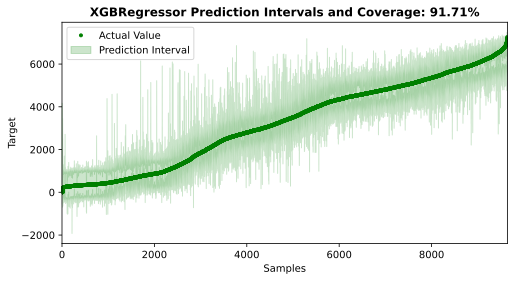

In [136]:
if need_mapie: 
  for name, data in models:
    predictions = data['predictions']
    coverage_percentage = data['coverage_percentage']
    # Sort the predictions by 'Actual Value' for better visualization and reset the index
    sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

    # Create a figure and axis object with specified size and resolution
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the actual values with green dots
    plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

    # Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
    plt.fill_between(np.arange(len(sorted_predictions)),
                    sorted_predictions["Lower Value"],
                    sorted_predictions["Upper Value"],
                    alpha=0.2, color="green", label="Prediction Interval")

    # Set font size for x and y ticks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Set the limit for the x-axis to cover the range of samples
    plt.xlim([0, len(sorted_predictions)])

    # Label the x-axis and y-axis with appropriate font size
    plt.xlabel("Samples", fontsize=10)
    plt.ylabel("Target", fontsize=10)

    # Add a title to the plot, including the coverage percentage, with bold formatting
    plt.title(f"{data['model'].__class__.__name__} Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

    # Add a legend to the plot, placed in the upper left, with specified font size
    plt.legend(loc="upper left", fontsize=10);
    plt.savefig(f'{data['model'].__class__.__name__}_coverage.svg')

In [137]:
for name, data in models:
  if need_mapie: 
    with open(f"{name}.pickle", "wb") as f:
      pickle.dump(data['mapie'], f)
  else:
    with open(f"{name}.pickle", "wb") as f:
      pickle.dump(data['model'], f)